<a href="https://colab.research.google.com/github/mikeguzman1294/PythonDataScience/blob/main/PythonProject.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Forest Fire Analysis
IMT Atlantique - IT Msc 2022

*Authors:*

1. *Miguel Ángel Guzmán Sánchez*

2. *Kadriye Nur Bakirci*

Referenced Documentation

[Dataset Repository](http://archive.ics.uci.edu/ml/datasets/Forest+Fires)

[Research Paper](http://www3.dsi.uminho.pt/pcortez/fires.pdf)

## Prepare the Enviroment & Data

In [6]:
# Clone the repo containing the dataset
!git clone -l -s https://github.com/mikeguzman1294/PythonDataScience.git cloned-repo
%cd cloned-repo/Projects/ForestFires

Cloning into 'cloned-repo'...
remote: Enumerating objects: 37, done.
remote: Counting objects: 100% (37/37), done.
remote: Compressing objects: 100% (31/31), done.
remote: Total 37 (delta 2), reused 29 (delta 0), pack-reused 0
Unpacking objects: 100% (37/37), done.
/content/cloned-repo/Projects/ForestFires/cloned-repo/Projects/ForestFires


In [7]:
# Import useful libraries
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns 
import numpy as np
import scipy as sp
from IPython.display import Image

In [8]:
# Convert csv into Pandas Dataframe
data_fires = pd.read_csv('Data/forestfires.csv')

## Explore the Dataset

In [9]:
# Get the shape of the dataframe
print(f'Dataset shape:\n{data_fires.shape}\n')

# Get the names of the attributes
print(f'Dataset attributes:\n{data_fires.columns}\n')

# Get the overall description of the dataset with the data types
print(f'Dataset general information:\n{data_fires.info()}\n')

# Get description of numerical attributes
print(f'Dataset description:\nNumerical Data\n{data_fires.describe().transpose()}\n')

# Get description of categorical attributes
print(f'Dataset description:\nCategorical Data\n{data_fires.describe(include = object).transpose()}')

Dataset shape:
(517, 13)

Dataset attributes:
Index(['X', 'Y', 'month', 'day', 'FFMC', 'DMC', 'DC', 'ISI', 'temp', 'RH',
       'wind', 'rain', 'area'],
      dtype='object')

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 517 entries, 0 to 516
Data columns (total 13 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   X       517 non-null    int64  
 1   Y       517 non-null    int64  
 2   month   517 non-null    object 
 3   day     517 non-null    object 
 4   FFMC    517 non-null    float64
 5   DMC     517 non-null    float64
 6   DC      517 non-null    float64
 7   ISI     517 non-null    float64
 8   temp    517 non-null    float64
 9   RH      517 non-null    int64  
 10  wind    517 non-null    float64
 11  rain    517 non-null    float64
 12  area    517 non-null    float64
dtypes: float64(8), int64(3), object(2)
memory usage: 52.6+ KB
Dataset general information:
None

Dataset description:
Numerical Data
      count        mean       

Attribute Interpretation:

1. X - x-axis spatial coordinate within the Montesinho park map: 1 to 9
2. Y - y-axis spatial coordinate within the Montesinho park map: 2 to 9
3. month - month of the year: 'jan' to 'dec'
4. day - day of the week: 'mon' to 'sun'
5. FFMC - FFMC index from the FWI system: 18.7 to 96.20
6. DMC - DMC index from the FWI system: 1.1 to 291.3
7. DC - DC index from the FWI system: 7.9 to 860.6
8. ISI - ISI index from the FWI system: 0.0 to 56.10
9. temp - temperature in Celsius degrees: 2.2 to 33.30
10. RH - relative humidity in %: 15.0 to 100
11. wind - wind speed in km/h: 0.40 to 9.40
12. rain - outside rain in mm/m2 : 0.0 to 6.4
13. area - the burned area of the forest (in ha): 0.00 to 1090.84

In [10]:
# Explore the first 10 tuples of the dataset
data_fires.head(10)

,X,Y,month,day,FFMC,DMC,DC,ISI,temp,RH,wind,rain,area
0,7,5,mar,fri,86.2,26.2,94.3,5.1,8.2,51,6.7,0.0,0.0
1,7,4,oct,tue,90.6,35.4,669.1,6.7,18.0,33,0.9,0.0,0.0
2,7,4,oct,sat,90.6,43.7,686.9,6.7,14.6,33,1.3,0.0,0.0
3,8,6,mar,fri,91.7,33.3,77.5,9.0,8.3,97,4.0,0.2,0.0
4,8,6,mar,sun,89.3,51.3,102.2,9.6,11.4,99,1.8,0.0,0.0
5,8,6,aug,sun,92.3,85.3,488.0,14.7,22.2,29,5.4,0.0,0.0
6,8,6,aug,mon,92.3,88.9,495.6,8.5,24.1,27,3.1,0.0,0.0
7,8,6,aug,mon,91.5,145.4,608.2,10.7,8.0,86,2.2,0.0,0.0
8,8,6,sep,tue,91.0,129.5,692.6,7.0,13.1,63,5.4,0.0,0.0
9,7,5,sep,sat,92.5,88.0,698.6,7.1,22.8,40,4.0,0.0,0.0


In [11]:
# Explore the last 10 tuples of the dataset
data_fires.tail(10)

,X,Y,month,day,FFMC,DMC,DC,ISI,temp,RH,wind,rain,area
507,2,4,aug,fri,91.0,166.9,752.6,7.1,25.9,41,3.6,0.0,0.00
508,1,2,aug,fri,91.0,166.9,752.6,7.1,25.9,41,3.6,0.0,0.00
509,5,4,aug,fri,91.0,166.9,752.6,7.1,21.1,71,7.6,1.4,2.17
510,6,5,aug,fri,91.0,166.9,752.6,7.1,18.2,62,5.4,0.0,0.43
511,8,6,aug,sun,81.6,56.7,665.6,1.9,27.8,35,2.7,0.0,0.00
512,4,3,aug,sun,81.6,56.7,665.6,1.9,27.8,32,2.7,0.0,6.44
513,2,4,aug,sun,81.6,56.7,665.6,1.9,21.9,71,5.8,0.0,54.29
514,7,4,aug,sun,81.6,56.7,665.6,1.9,21.2,70,6.7,0.0,11.16
515,1,4,aug,sat,94.4,146.0,614.7,11.3,25.6,42,4.0,0.0,0.00
516,6,3,nov,tue,79.5,3.0,106.7,1.1,11.8,31,4.5,0.0,0.00


In [12]:
# Check for any null values once again
print(f'Null Values per Feature\n{data_fires.isnull().sum()}\n')

Null Values per Feature
X        0
Y        0
month    0
day      0
FFMC     0
DMC      0
DC       0
ISI      0
temp     0
RH       0
wind     0
rain     0
area     0
dtype: int64



Since there are no null values in the raw data, no null vale handling technique is required

##Feature Analysis & Engineering

First, create a copy of the raw dataset so the original data set information is preserved in case any transformation is required.

In [13]:
# The copy owns the data and any changes made to the copy will not affect the raw data.
# Any changes made to the original array will not affect the copy as well.
trans_data_fires  = data_fires.copy()

### Geographic Features Analysis

At first glance, the X & Y location features of the dataset do not provide good intuition on how the actual sampling is handled across the region of interest. How do the coordinates actually translate in the geography of the Montesinho Park? For that reason, it is important to know how the park looks like from the chosen coordinate standpoint.

A low quality map was found in the referenced research paper and some image processing techniques were applied to strenghten the edges and expand the pixels of the picture, fortunately, the original image provided a good reference on how the coordinates are distributed.

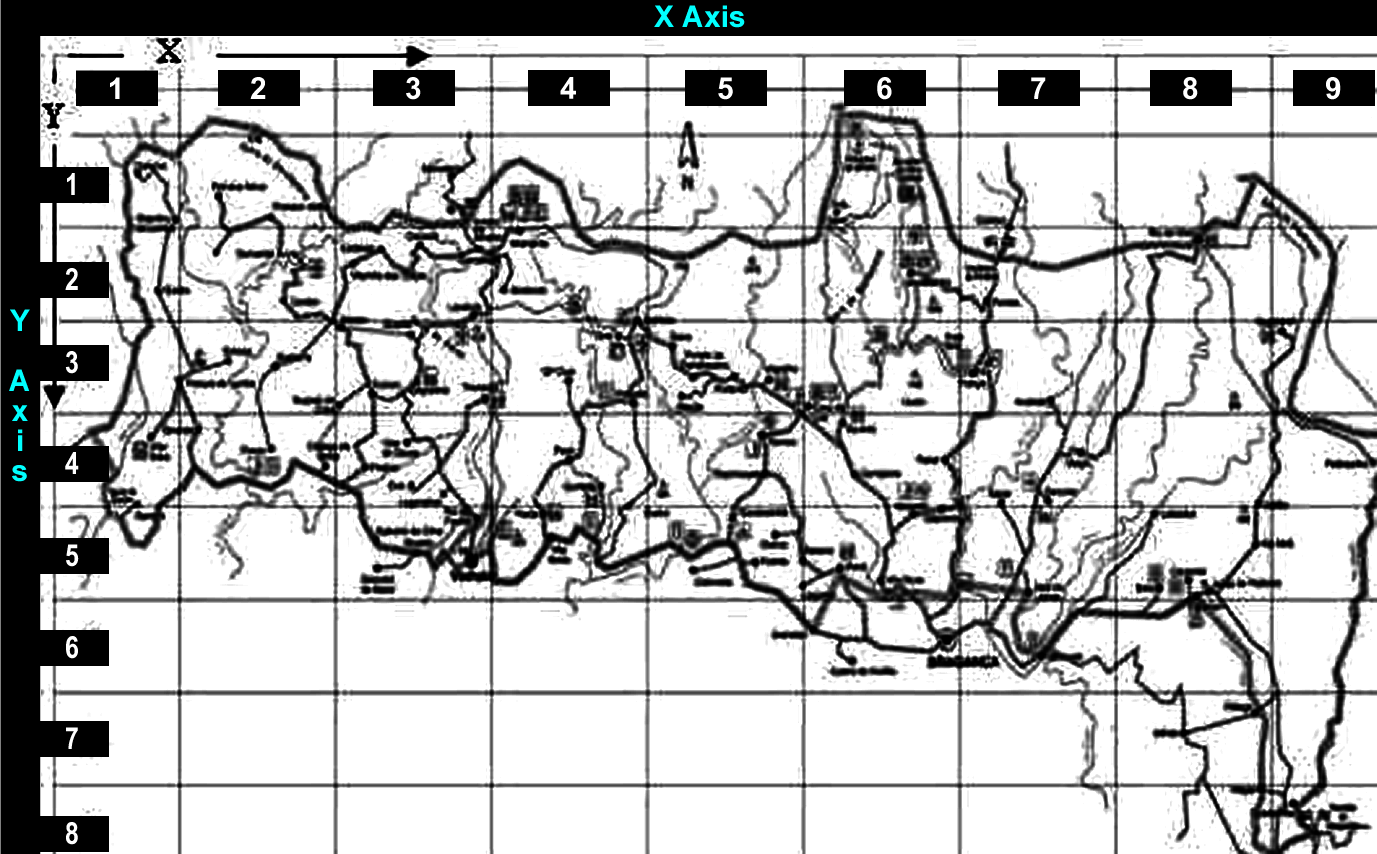

In [14]:
# Display Montesinho Park map
Image(filename = "Images/MontesinhoPark.png", width = 700, height = 350)

A KDE plot was chosen as a neat visualization option to get insight on how the sampling was obtained across the Montesinho park. This allows us to know what regions are the most and least sampled for our dataset. Axis adjustment had to be performed to ensure the SNS figure matched the given park´s map format so the relationship between both pictures is neat.

Text(0.5, 1.0, 'Sampling Distribution - Montesinho Park')

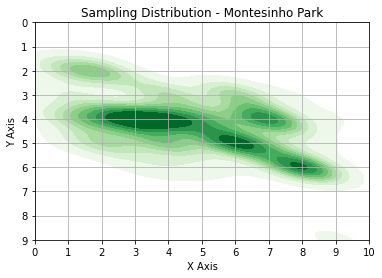

In [15]:
# Create KDE Plot for sampling concentration on region quadrants
plot_map = sns.kdeplot(data=data_fires, x="X", y="Y", shade = True, cmap = "Greens")
plot_map.grid()
plot_map.set_xlim(0,9)
plot_map.set_ylim(0,9)
plot_map.invert_yaxis()

# Add label to the X-axis
plot_map.set_xlabel( "X Axis")
plot_map.set_xticks(range(11))
 
# Add label to the Y-axis
plot_map.set_ylabel( "Y Axis")
 
# Add title to the plot
plot_map.set_title( "Sampling Distribution - Montesinho Park")

Sampling is concentraded mostly in quadrants (3,4), (4,4), (6,5) and (8,6), where each tuple represents a coordinate (x,y).

### Date Features Reformat

In [16]:
# Import Required Libraries for the Section
from pandas.api.types import CategoricalDtype

#### Month Feature

In [17]:
# Get unique values of month feature
print(f'\nMonth Unique Values:\n')
print(data_fires.month.unique())


Month Unique Values:

['mar' 'oct' 'aug' 'sep' 'apr' 'jun' 'jul' 'feb' 'jan' 'dec' 'may' 'nov']


After seeing the unique categories of the month feature, the labels can definitely improve their naming for the visualization.



In [18]:
# Create Labels Dictionary
month_dict = {'jan': 'January',
              'feb': 'February',
              'mar': 'March',
              'apr': 'April',
              'may': 'May',
              'jun': 'June',
              'jul': 'July',
              'aug': 'August',
              'sep': 'September',
              'oct': 'October',
              'nov': 'November',
              'dec': 'December'}
              
# Replace old labels with more significant ones
trans_data_fires['month'] = data_fires['month'].apply( lambda x : month_dict[x])

[Text(0, 0, 'January'),
 Text(0, 0, 'February'),
 Text(0, 0, 'March'),
 Text(0, 0, 'April'),
 Text(0, 0, 'May'),
 Text(0, 0, 'June'),
 Text(0, 0, 'July'),
 Text(0, 0, 'August'),
 Text(0, 0, 'September'),
 Text(0, 0, 'October'),
 Text(0, 0, 'November'),
 Text(0, 0, 'December')]

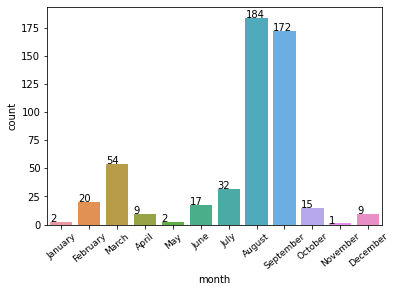

In [19]:
# Create list of ordered categories
month_cats = ['January','February','March','April','May','June',\
              'July','August','September','October','November','December']

# Create an ordered categorical for the months feature
month_cat_type = CategoricalDtype(categories=month_cats, ordered=True)
trans_data_fires['month'] = trans_data_fires['month'].astype(month_cat_type)

# Plot the ordered days count
months_plot = sns.countplot(data=trans_data_fires, x='month')

# Show the count values on top of the bars of the countplot
for p in months_plot.patches:
   months_plot.annotate('{:d}'.format(p.get_height()), (p.get_x(), p.get_height()+0.01))

# Rotate and scale x-axis labels
months_plot.set_xticklabels(months_plot.get_xticklabels(), rotation=40, fontsize=9)

It can be clearly seen that some months have virtually no data while others have a significant amount of data.Therefore it was decided to group the data into seasons. The split followed the traditional definition of season:

* Spring: March, April, May
* Summer: June, July, August
* Fall: September, October, November
* Winter: December, January, February

The work in this report could be extended to months if additional data was available.

In [20]:
# Create Labels Dictionary
season_dict = {'jan': 'Winter',
               'feb': 'Winter',
               'mar': 'Spring',
               'apr': 'Spring',
               'may': 'Spring',
               'jun': 'Summer',
               'jul': 'Summer',
               'aug': 'Summer',
               'sep': 'Fall',
               'oct': 'Fall',
               'nov': 'Fall',
               'dec': 'Winter'}
              
# Replace old labels with more significant ones
trans_data_fires['season'] = data_fires['month'].apply( lambda x : season_dict[x])

[Text(0, 0, 'Spring'),
 Text(0, 0, 'Summer'),
 Text(0, 0, 'Fall'),
 Text(0, 0, 'Winter')]

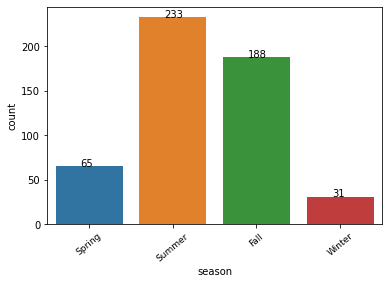

In [21]:
# Create list of ordered categories
season_cats = ['Spring','Summer', 'Fall', 'Winter']

# Create an ordered categorical for the months feature
season_cat_type = CategoricalDtype(categories=season_cats, ordered=True)
trans_data_fires['season'] = trans_data_fires['season'].astype(season_cat_type)

# Plot the ordered days count
seasons_plot = sns.countplot(data=trans_data_fires, x='season')

# Show the count values on top of the bars of the countplot
for p in seasons_plot.patches:
   seasons_plot.annotate('{:d}'.format(p.get_height()), (p.get_x()+0.3, p.get_height()+0.01))

# Rotate and scale x-axis labels
seasons_plot.set_xticklabels(seasons_plot.get_xticklabels(), rotation=40, fontsize=9)

In [22]:
# Relocate new season calculated feature for neatness
trans_data_fires.insert(3, 'season', trans_data_fires.pop('season'))
trans_data_fires

,X,Y,month,season,day,FFMC,DMC,DC,ISI,temp,RH,wind,rain,area
0,7,5,March,Spring,fri,86.2,26.2,94.3,5.1,8.2,51,6.7,0.0,0.00
1,7,4,October,Fall,tue,90.6,35.4,669.1,6.7,18.0,33,0.9,0.0,0.00
2,7,4,October,Fall,sat,90.6,43.7,686.9,6.7,14.6,33,1.3,0.0,0.00
3,8,6,March,Spring,fri,91.7,33.3,77.5,9.0,8.3,97,4.0,0.2,0.00
4,8,6,March,Spring,sun,89.3,51.3,102.2,9.6,11.4,99,1.8,0.0,0.00
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
512,4,3,August,Summer,sun,81.6,56.7,665.6,1.9,27.8,32,2.7,0.0,6.44
513,2,4,August,Summer,sun,81.6,56.7,665.6,1.9,21.9,71,5.8,0.0,54.29
514,7,4,August,Summer,sun,81.6,56.7,665.6,1.9,21.2,70,6.7,0.0,11.16
515,1,4,August,Summer,sat,94.4,146.0,614.7,11.3,25.6,42,4.0,0.0,0.00


#### Day Feature

In [23]:
# Get unique values of day feature
print(f'\nDay Unique Values:\n')
print(data_fires.day.unique())


Day Unique Values:

['fri' 'tue' 'sat' 'sun' 'mon' 'wed' 'thu']


After seeing the unique categories of the day feature, the labels can definitely improve their naming for the visualization.

In [24]:
# Create Labels Dictionary
day_dict = {'mon': 'Monday',
            'tue': 'Tuesday',
            'wed': 'Wednesday',
            'thu': 'Thursday',
            'fri': 'Friday',
            'sat': 'Saturday',
            'sun': 'Sunday'}

# Replace old labels with more significant ones
trans_data_fires['day'] = data_fires['day'].apply( lambda x : day_dict[x])

[Text(0, 0, 'Monday'),
 Text(0, 0, 'Tuesday'),
 Text(0, 0, 'Wednesday'),
 Text(0, 0, 'Thursday'),
 Text(0, 0, 'Friday'),
 Text(0, 0, 'Saturday'),
 Text(0, 0, 'Sunday')]

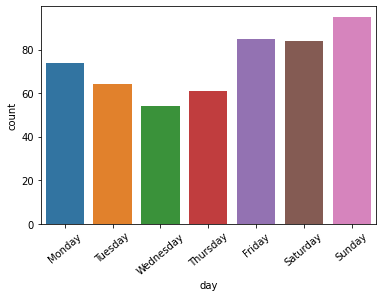

In [25]:
# Create list of ordered categories
day_cats = ['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday']

# Create an ordered categorical for the days feature
day_cat_type = CategoricalDtype(categories=day_cats, ordered=True)
trans_data_fires['day'] = trans_data_fires['day'].astype(day_cat_type)

# Plot the ordered days count
days_plot = sns.countplot(data=trans_data_fires, x='day')

# Rotate and scale x-axis labels
days_plot.set_xticklabels(days_plot.get_xticklabels(), rotation=40)

Unlike the months, each day has a fair amount of data so no new feature will be created for the days per se. Although this categorical variable will be one-hot ecnoded as well in the modelling section so 7 individual binary variables will be created.

### Transform the Dependent Variable for Regression Techniques

Observe the distribution of the dependent variable.

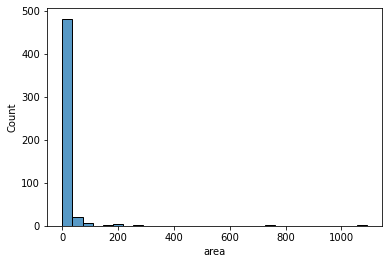

In [26]:
sns.histplot(data=data_fires, x="area", bins=30)
#sns.distplot(data_fires.area, bins=30)

It's clear that the data is heavily skewed towards zero acres being burned.

Presence of outliers can be noticed on the histogram. In order to spot them better visually, a boxplot is graphed.

/usr/local/lib/python3.7/dist-packages/seaborn/_core.py:1326: UserWarning: Vertical orientation ignored with only `x` specified.
  warnings.warn(single_var_warning.format("Vertical", "x"))


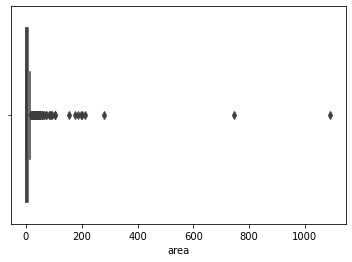

In [27]:
sns.boxplot(data = data_fires, x= 'area', orient = 'v')
#sns.boxplot(data = data_fires[data_fires.area < 400], x= 'area', orient = 'v')

Log(x+1) transformation is often used for transforming data that are **right-skewed**, but **also include zero values**. The shape of the resulting distribution will depend on how big x is compared to the constant 1. Therefore the shape of the resulting distribution depends on the units in which x was measured. Log transformation also de-emphasizes outliers.

In [28]:
# Apply log(x+1) transform to the area column
#trans_data_fires['area'] = np.log(trans_data_fires['area'] + 1)
trans_data_fires['area'] = np.log1p(trans_data_fires['area'])

In [29]:
# Get description of original dependent variable
print(f'Original Burned Area:\n')
print(data_fires['area'].describe())

# Get description of log(area+1)-transformed dependent variable
print(f'\nLog-Transformed Burned Area:\n')
print(trans_data_fires['area'].describe())

Original Burned Area:

count     517.000000
mean       12.847292
std        63.655818
min         0.000000
25%         0.000000
50%         0.520000
75%         6.570000
max      1090.840000
Name: area, dtype: float64

Log-Transformed Burned Area:

count    517.000000
mean       1.111026
std        1.398436
min        0.000000
25%        0.000000
50%        0.418710
75%        2.024193
max        6.995620
Name: area, dtype: float64


Incroyable! While our area column had extreme values ranging from 0 to 1090.84 the log values are now ranging from 0 to 6.99! Thus, the log operation had a dual role:

*   Reducing the impact of too-low values.
*   Reducing the impact of too-high values.

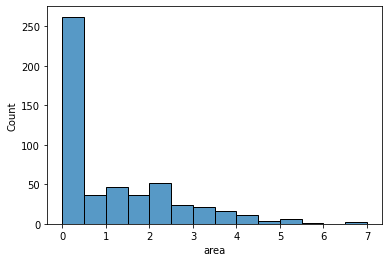

In [30]:
sns.histplot(data=trans_data_fires, x="area")

The distribution of the data improved deeply after the log(x+1) distribution as it can be noticed in the histogram.

### Correlation Within Variables Analysis

It's time to start a feature correlation analysis.

In [31]:
trans_data_fires.iloc[:,2:].corr()

,FFMC,DMC,DC,ISI,temp,RH,wind,rain,area
FFMC,1.000000,0.382619,0.330512,0.531805,0.431532,-0.300995,-0.028485,0.056702,0.046799
DMC,0.382619,1.000000,0.682192,0.305128,0.469594,0.073795,-0.105342,0.074790,0.067153
DC,0.330512,0.682192,1.000000,0.229154,0.496208,-0.039192,-0.203466,0.035861,0.066360
ISI,0.531805,0.305128,0.229154,1.000000,0.394287,-0.132517,0.106826,0.067668,-0.010347
temp,0.431532,0.469594,0.496208,0.394287,1.000000,-0.527390,-0.227116,0.069491,0.053487
RH,-0.300995,0.073795,-0.039192,-0.132517,-0.527390,1.000000,0.069410,0.099751,-0.053662
wind,-0.028485,-0.105342,-0.203466,0.106826,-0.227116,0.069410,1.000000,0.061119,0.066973
rain,0.056702,0.074790,0.035861,0.067668,0.069491,0.099751,0.061119,1.000000,0.023311
area,0.046799,0.067153,0.066360,-0.010347,0.053487,-0.053662,0.066973,0.023311,1.000000


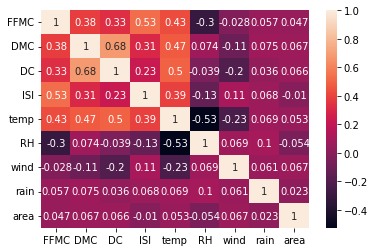

In [32]:
sns.heatmap(trans_data_fires.iloc[:,2:].corr(), annot = True);

Since the intention is to predict the influence of meteorological and surface conditions on the origin of fires, the burned area of the forests would be naturally chosen as the dependent variable among all the attributes of the dataset.

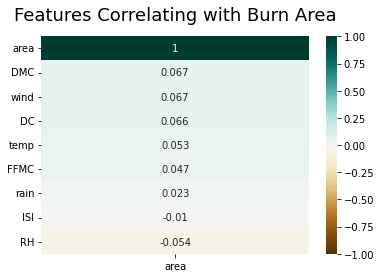

In [33]:
heatmap = sns.heatmap(trans_data_fires.iloc[:,2:].corr()[['area']].sort_values(by='area', ascending=False), vmin=-1, vmax=1, annot=True, cmap='BrBG')
heatmap.set_title('Features Correlating with Burn Area', fontdict={'fontsize':18}, pad=16);

From these plots it can be seen that there is no strong trend between any one of the variables and the log area.


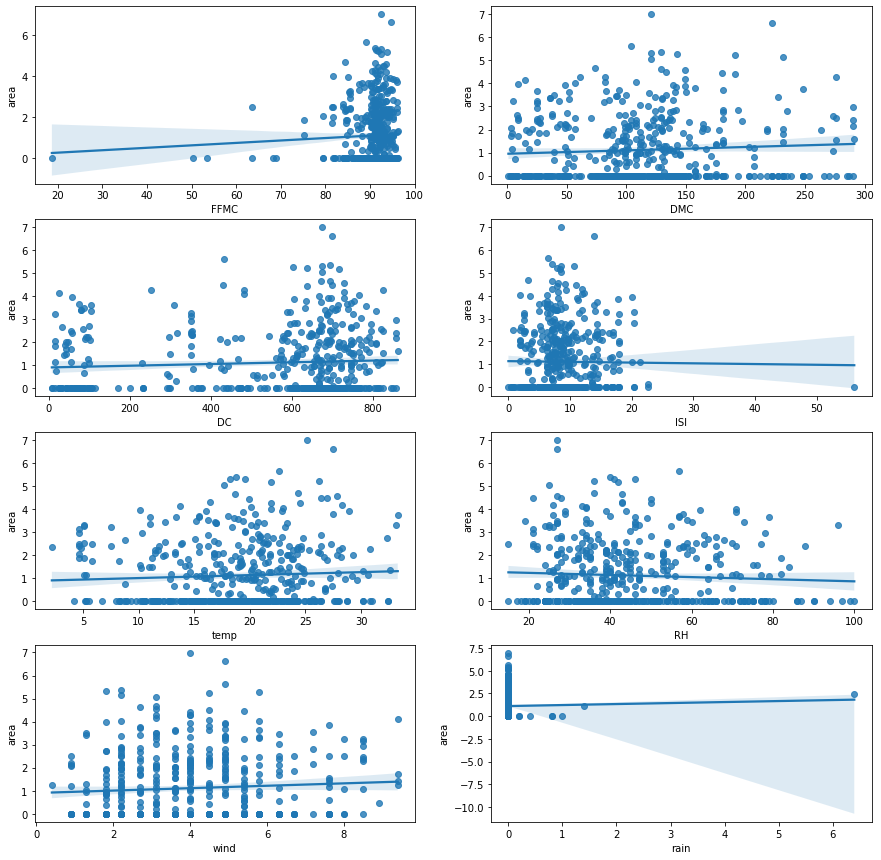

In [34]:
# Linear regression against dependent variable
f, axes = plt.subplots(4,2, figsize=(15, 15))
counter = 0

for rows in range(4):
  for columns in range(2):    
    sns.regplot(x=trans_data_fires.iloc[:,(counter+5)], y=trans_data_fires['area'], ax = axes[rows,columns])
    counter += 1

After evaluating the linear regression plots in above dashboard for every independent variable, there doesn't seem to be any kind of linear correlation between any predictor variable and the dependent variable.

## Supervised Learning: Regression

In [35]:
# Import Metrics Library
from sklearn.metrics import r2_score

In [36]:
# Make a copy of the transformed data set before adjusting for regression model
reg_data_fires  = trans_data_fires.copy()
reg_data_fires.drop(['X', 'Y', 'month'], axis = 1, inplace=True)
reg_data_fires.tail(6)

,season,day,FFMC,DMC,DC,ISI,temp,RH,wind,rain,area
511,Summer,Sunday,81.6,56.7,665.6,1.9,27.8,35,2.7,0.0,0.000000
512,Summer,Sunday,81.6,56.7,665.6,1.9,27.8,32,2.7,0.0,2.006871
513,Summer,Sunday,81.6,56.7,665.6,1.9,21.9,71,5.8,0.0,4.012592
514,Summer,Sunday,81.6,56.7,665.6,1.9,21.2,70,6.7,0.0,2.498152
515,Summer,Saturday,94.4,146.0,614.7,11.3,25.6,42,4.0,0.0,0.000000
516,Fall,Tuesday,79.5,3.0,106.7,1.1,11.8,31,4.5,0.0,0.000000


### Data Preprocessing

In [37]:
# Split the Dependent Variable from the Independent Variables
# Exclude coordinate features since they do not provide relevant information
X = reg_data_fires.iloc[:,:-1].values
y = reg_data_fires.iloc[:,-1].values

Encode the Categorical Data

In [38]:
# One-Hot encode day and month categorical variables
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import OneHotEncoder
ct = ColumnTransformer(transformers=[('encoder', OneHotEncoder(), [0,1])], remainder='passthrough')
X = np.array(ct.fit_transform(X))

In [39]:
# Print the first 7 rows of Independent Variables to verify One-Hot Encoding
X[0:7]

array([[0.0, 1.0, 0.0, 0.0, 1.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 86.2,
        26.2, 94.3, 5.1, 8.2, 51, 6.7, 0.0],
       [1.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 1.0, 0.0, 90.6,
        35.4, 669.1, 6.7, 18.0, 33, 0.9, 0.0],
       [1.0, 0.0, 0.0, 0.0, 0.0, 0.0, 1.0, 0.0, 0.0, 0.0, 0.0, 90.6,
        43.7, 686.9, 6.7, 14.6, 33, 1.3, 0.0],
       [0.0, 1.0, 0.0, 0.0, 1.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 91.7,
        33.3, 77.5, 9.0, 8.3, 97, 4.0, 0.2],
       [0.0, 1.0, 0.0, 0.0, 0.0, 0.0, 0.0, 1.0, 0.0, 0.0, 0.0, 89.3,
        51.3, 102.2, 9.6, 11.4, 99, 1.8, 0.0],
       [0.0, 0.0, 1.0, 0.0, 0.0, 0.0, 0.0, 1.0, 0.0, 0.0, 0.0, 92.3,
        85.3, 488.0, 14.7, 22.2, 29, 5.4, 0.0],
       [0.0, 0.0, 1.0, 0.0, 0.0, 1.0, 0.0, 0.0, 0.0, 0.0, 0.0, 92.3,
        88.9, 495.6, 8.5, 24.1, 27, 3.1, 0.0]], dtype=object)

In [40]:
# Print the first 7 rows of Dependent Variable for sanity check
y[-1:-7:-1]

array([0.        , 0.        , 2.49815188, 4.01259206, 2.00687085,
       0.        ])

Split the Dataset Into the Training Test and Test Set

In [41]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 0)

Now that dataset has been fully pre-processed for regression modelling, several regression models will be trained and their performance will be compared using the R-squared metric.

For this section no feature scaling technique was performed on the predictor variables since neither multiple linear regression, polynomial regression (scale difference is compensated by the equation coeficients of each feature) or tree-based algorithms require it to improve performance.

If we had used something like a Support Vector Regressor it would have been another story and scaling would be required, but for our selected models, it makes no difference. Scaling techniques will be required in Classification and Clustering algorithms in following sections.

### Multiple Linear Regression

In [42]:
from sklearn.linear_model import LinearRegression
regressor = LinearRegression()
regressor.fit(X_train, y_train)

LinearRegression()

Predict the Test Set Results

In [43]:
y_pred = regressor.predict(X_test)
np.set_printoptions(precision=2)
print(np.concatenate((y_pred.reshape(len(y_pred),1), y_test.reshape(len(y_test),1)),1))

[[0.97 3.34]
 [0.88 0.  ]
 [1.21 1.16]
 [1.43 4.49]
 [0.61 1.31]
 [1.28 0.  ]
 [1.31 1.08]
 [0.81 0.  ]
 [0.8  2.85]
 [1.86 0.  ]
 [0.78 1.24]
 [1.99 3.14]
 [0.91 2.41]
 [0.92 0.  ]
 [1.25 2.96]
 [0.51 0.  ]
 [0.73 0.94]
 [1.04 3.79]
 [1.82 0.74]
 [0.93 2.12]
 [0.81 0.  ]
 [1.36 1.47]
 [1.92 1.73]
 [1.16 1.92]
 [1.53 4.27]
 [1.1  3.23]
 [1.29 0.  ]
 [1.29 0.  ]
 [1.34 0.  ]
 [1.09 0.  ]
 [1.15 0.  ]
 [1.02 1.44]
 [1.   0.  ]
 [1.35 2.26]
 [1.13 1.93]
 [0.93 5.29]
 [0.89 0.  ]
 [0.61 0.94]
 [1.46 7.  ]
 [1.14 0.  ]
 [0.54 4.01]
 [0.94 0.  ]
 [1.08 0.34]
 [1.25 0.  ]
 [1.15 0.  ]
 [1.2  0.99]
 [1.17 1.99]
 [1.09 0.  ]
 [0.77 0.97]
 [1.04 1.11]
 [0.89 1.83]
 [1.18 2.5 ]
 [0.86 0.  ]
 [1.33 3.57]
 [1.16 1.96]
 [0.93 0.  ]
 [1.63 0.  ]
 [0.1  0.  ]
 [1.08 2.12]
 [0.61 3.5 ]
 [0.86 0.  ]
 [1.03 0.57]
 [0.95 2.21]
 [1.37 3.9 ]
 [1.05 3.66]
 [1.23 5.31]
 [0.71 0.  ]
 [1.03 1.4 ]
 [1.79 0.  ]
 [1.17 3.86]
 [1.05 2.4 ]
 [0.97 0.  ]
 [1.41 0.  ]
 [1.33 1.79]
 [1.21 1.27]
 [0.85 0.  ]
 [1.34 0.  ]

Evaluate Model Performance with R-Squared Metric.

In [44]:
r2_score(y_test, y_pred)

-0.008764211284334245

### Polynomial Regression

In [45]:
from sklearn.preprocessing import PolynomialFeatures
from sklearn.linear_model import LinearRegression
poly_reg = PolynomialFeatures(degree = 4)
X_poly = poly_reg.fit_transform(X_train)
regressor = LinearRegression()
regressor.fit(X_poly, y_train)

LinearRegression()

Predict the Test Set Results

In [46]:
y_pred = regressor.predict(poly_reg.transform(X_test))
np.set_printoptions(precision=2, suppress=True)
print(np.concatenate((y_pred.reshape(len(y_pred),1), y_test.reshape(len(y_test),1)),1))

[[   3.63    3.34]
 [   1.96    0.  ]
 [ -45.21    1.16]
 [  -0.      4.49]
 [ -44.81    1.31]
 [  -8.4     0.  ]
 [  -9.55    1.08]
 [-179.35    0.  ]
 [ -40.38    2.85]
 [  57.13    0.  ]
 [   2.54    1.24]
 [   2.59    3.14]
 [  74.28    2.41]
 [  14.02    0.  ]
 [ 108.17    2.96]
 [  11.97    0.  ]
 [  17.07    0.94]
 [  32.76    3.79]
 [  40.66    0.74]
 [  39.9     2.12]
 [ -52.16    0.  ]
 [  -7.83    1.47]
 [  10.37    1.73]
 [ -30.93    1.92]
 [  64.61    4.27]
 [  27.87    3.23]
 [-211.8     0.  ]
 [ 142.06    0.  ]
 [ -51.8     0.  ]
 [  11.61    0.  ]
 [ -20.95    0.  ]
 [ -28.87    1.44]
 [  -1.17    0.  ]
 [  -0.86    2.26]
 [  88.15    1.93]
 [   3.77    5.29]
 [   2.81    0.  ]
 [  97.24    0.94]
 [   3.25    7.  ]
 [ -10.76    0.  ]
 [-558.7     4.01]
 [  -4.31    0.  ]
 [  39.77    0.34]
 [   1.66    0.  ]
 [   3.14    0.  ]
 [  -0.      0.99]
 [ -36.38    1.99]
 [   6.68    0.  ]
 [  -5.32    0.97]
 [   1.77    1.11]
 [  -0.      1.83]
 [ -18.88    2.5 ]
 [  -3.16   

Evaluate Model Performance with R-Squared Metric.

In [47]:
r2_score(y_test, y_pred)

-4602.50269085885

### Random Forest Regression

In [48]:
from sklearn.ensemble import RandomForestRegressor
regressor = RandomForestRegressor(n_estimators = 10, random_state = 0)
regressor.fit(X_train, y_train)

RandomForestRegressor(n_estimators=10, random_state=0)

Predict the Test Set Results

In [49]:
y_pred = regressor.predict(X_test)
np.set_printoptions(precision=2, suppress=True)
print(np.concatenate((y_pred.reshape(len(y_pred),1), y_test.reshape(len(y_test),1)),1))
#print(np.concatenate((np.expm1(y_pred.reshape(len(y_pred),1)), np.expm1(y_test.reshape(len(y_test),1))),1))

[[2.65 3.34]
 [1.69 0.  ]
 [1.13 1.16]
 [0.04 4.49]
 [0.77 1.31]
 [1.34 0.  ]
 [0.63 1.08]
 [1.38 0.  ]
 [0.49 2.85]
 [0.43 0.  ]
 [0.92 1.24]
 [2.56 3.14]
 [1.68 2.41]
 [1.24 0.  ]
 [1.76 2.96]
 [1.55 0.  ]
 [1.32 0.94]
 [2.2  3.79]
 [1.14 0.74]
 [1.12 2.12]
 [1.45 0.  ]
 [0.36 1.47]
 [2.19 1.73]
 [0.92 1.92]
 [2.32 4.27]
 [1.02 3.23]
 [0.81 0.  ]
 [0.98 0.  ]
 [1.1  0.  ]
 [0.24 0.  ]
 [1.64 0.  ]
 [1.39 1.44]
 [1.96 0.  ]
 [1.71 2.26]
 [0.63 1.93]
 [0.13 5.29]
 [0.   0.  ]
 [0.49 0.94]
 [1.2  7.  ]
 [2.93 0.  ]
 [2.08 4.01]
 [2.15 0.  ]
 [0.77 0.34]
 [0.56 0.  ]
 [0.77 0.  ]
 [1.22 0.99]
 [2.55 1.99]
 [0.24 0.  ]
 [0.34 0.97]
 [1.32 1.11]
 [0.17 1.83]
 [0.79 2.5 ]
 [2.07 0.  ]
 [1.93 3.57]
 [1.12 1.96]
 [0.75 0.  ]
 [0.87 0.  ]
 [1.24 0.  ]
 [1.03 2.12]
 [1.17 3.5 ]
 [1.44 0.  ]
 [1.11 0.57]
 [0.52 2.21]
 [0.7  3.9 ]
 [1.77 3.66]
 [0.58 5.31]
 [0.   0.  ]
 [1.45 1.4 ]
 [0.34 0.  ]
 [1.01 3.86]
 [1.69 2.4 ]
 [0.51 0.  ]
 [1.06 0.  ]
 [1.42 1.79]
 [2.29 1.27]
 [1.13 0.  ]
 [2.25 0.  ]

Evaluate Model Performance with R-Squared Metric.

In [50]:
r2_score(y_test, y_pred)

-0.14999238380591318

R-squared value was chosen as the metric to evaluate the performance of all the regression models.
After seeing the results, R-squared values are absolute trash for the 3 regression models, but that was expected given the null correlations to the dependent variable.

For the sake of mental health, this analysis will only cover regressional models trying to predict the burn area dependent variable, because it is very likely that regression models will still perform very poorly given other dependent variable.

## Supervised Learning: Classification

In [51]:
# Import Metrics Library
from sklearn.metrics import confusion_matrix, accuracy_score

In [52]:
# Make a copy of the transformed data set before modifying for classification model
clas_data_fires  = trans_data_fires.copy()
clas_data_fires.drop(['X', 'Y', 'month', 'area'], axis = 1, inplace=True)
clas_data_fires.tail(6)

,season,day,FFMC,DMC,DC,ISI,temp,RH,wind,rain
511,Summer,Sunday,81.6,56.7,665.6,1.9,27.8,35,2.7,0.0
512,Summer,Sunday,81.6,56.7,665.6,1.9,27.8,32,2.7,0.0
513,Summer,Sunday,81.6,56.7,665.6,1.9,21.9,71,5.8,0.0
514,Summer,Sunday,81.6,56.7,665.6,1.9,21.2,70,6.7,0.0
515,Summer,Saturday,94.4,146.0,614.7,11.3,25.6,42,4.0,0.0
516,Fall,Tuesday,79.5,3.0,106.7,1.1,11.8,31,4.5,0.0


### Create the Dependent Variable for Classification Model

The intention is to transform the numerical dependent variable into a categorical variable. For that it sounds reasonable to have a variable that classifies a fire size/impact-danger given the burned area.

The categorical varible will be generated according to the following class-logic.

* Class 0: No fires or fire danger
* Classes 1: Small fires (0-7 hectares) will occur, mild fire danger
* Classes 2: Medium sized fires (7-55 hectares) will occur, significant fire danger
* Classes 3: Large fires (55-404 hectares) will occur, severe fire danger
* Class 4: Catastrophic fires (404+ hectares) will occur, extraordinary fire danger

This was inspired by the following paper, which threw some close to decent results. [Modeling Forest Fires in Montesinho
Natural Park](https://orgs.mines.edu/daa/wp-content/uploads/sites/38/2019/05/Math_437_Project1.pdf)


In [53]:
clas_data_fires['cat_fire'] = pd.cut( data_fires['area'], \
                                       bins=[float('-inf'), 0, 7, 55, 404, float('inf')], \
                                       labels=['no_fire', 'small_fire', 'medium_fire', 'large_fire', 'catastrophic_fire'] )

In [54]:
# Get description of fire intensity category
print(f'\nFire Category:\n')
print(clas_data_fires['cat_fire'].describe(),'\n')

# Get unique values of fire intensity categories
print(f'\nFire Category Unique Values:\n')
print(clas_data_fires.cat_fire.unique())


Fire Category:

count         517
unique          5
top       no_fire
freq          247
Name: cat_fire, dtype: object 


Fire Category Unique Values:

['no_fire', 'small_fire', 'medium_fire', 'large_fire', 'catastrophic_fire']
Categories (5, object): ['no_fire' < 'small_fire' < 'medium_fire' < 'large_fire' <
                         'catastrophic_fire']


In order to check whether the fires were categorized correctly, the original burned area values are compared against their associated category.

In [55]:
# Concatenate original burned area against new fire category
pd.concat([data_fires['area'], clas_data_fires['cat_fire']], axis=1).tail(14)

,area,cat_fire
503,1.95,small_fire
504,49.59,medium_fire
505,5.80,small_fire
506,0.00,no_fire
507,0.00,no_fire
508,0.00,no_fire
509,2.17,small_fire
510,0.43,small_fire
511,0.00,no_fire
512,6.44,small_fire


Plot the distribution of the newly created fire intensity categorical variable.

[Text(0, 0, 'no_fire'),
 Text(0, 0, 'small_fire'),
 Text(0, 0, 'medium_fire'),
 Text(0, 0, 'large_fire'),
 Text(0, 0, 'catastrophic_fire')]

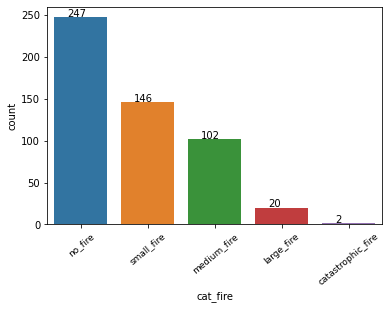

In [56]:
# Create list of ordered categories
fire_cats = ['no_fire', 'small_fire', 'medium_fire', 'large_fire', 'catastrophic_fire']

# Create an ordered categorical for the fire classification feature
fires_cat_type = CategoricalDtype(categories=fire_cats, ordered=True)
clas_data_fires['cat_fire'] = clas_data_fires['cat_fire'].astype(fires_cat_type)

# Plot the ordered fire categories count
fires_plot = sns.countplot(data=clas_data_fires, x='cat_fire')

# Show the count values on top of the bars of the countplot
for p in fires_plot.patches:
  fires_plot.annotate('{:d}'.format(p.get_height()), (p.get_x()+0.2, p.get_height()+0.5))

# Rotate and scale x-axis labels
fires_plot.set_xticklabels(fires_plot.get_xticklabels(), rotation=40, fontsize=9)

### Data Preprocessing

In [57]:
clas_data_fires

,season,day,FFMC,DMC,DC,ISI,temp,RH,wind,rain,cat_fire
0,Spring,Friday,86.2,26.2,94.3,5.1,8.2,51,6.7,0.0,no_fire
1,Fall,Tuesday,90.6,35.4,669.1,6.7,18.0,33,0.9,0.0,no_fire
2,Fall,Saturday,90.6,43.7,686.9,6.7,14.6,33,1.3,0.0,no_fire
3,Spring,Friday,91.7,33.3,77.5,9.0,8.3,97,4.0,0.2,no_fire
4,Spring,Sunday,89.3,51.3,102.2,9.6,11.4,99,1.8,0.0,no_fire
...,...,...,...,...,...,...,...,...,...,...,...
512,Summer,Sunday,81.6,56.7,665.6,1.9,27.8,32,2.7,0.0,small_fire
513,Summer,Sunday,81.6,56.7,665.6,1.9,21.9,71,5.8,0.0,medium_fire
514,Summer,Sunday,81.6,56.7,665.6,1.9,21.2,70,6.7,0.0,medium_fire
515,Summer,Saturday,94.4,146.0,614.7,11.3,25.6,42,4.0,0.0,no_fire


In [58]:
# Split the Dependent Variable from the Independent Variables
# Exclude coordinate features since they do not provide relevant information
X_clas = clas_data_fires.iloc[:,:-1].values
y_clas = clas_data_fires.iloc[:,-1].values

Encode the Categorical Data

In [59]:
# One-Hot encode day and month categorical variables
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import OneHotEncoder
ct = ColumnTransformer(transformers=[('encoder', OneHotEncoder(), [0,1])], remainder='passthrough')
X_clas = np.array(ct.fit_transform(X_clas))

In [60]:
# Print the first 7 rows of Independent Variables to verify One-Hot Encoding
X_clas[0:7,:]

array([[0.0, 1.0, 0.0, 0.0, 1.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 86.2,
        26.2, 94.3, 5.1, 8.2, 51, 6.7, 0.0],
       [1.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 1.0, 0.0, 90.6,
        35.4, 669.1, 6.7, 18.0, 33, 0.9, 0.0],
       [1.0, 0.0, 0.0, 0.0, 0.0, 0.0, 1.0, 0.0, 0.0, 0.0, 0.0, 90.6,
        43.7, 686.9, 6.7, 14.6, 33, 1.3, 0.0],
       [0.0, 1.0, 0.0, 0.0, 1.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 91.7,
        33.3, 77.5, 9.0, 8.3, 97, 4.0, 0.2],
       [0.0, 1.0, 0.0, 0.0, 0.0, 0.0, 0.0, 1.0, 0.0, 0.0, 0.0, 89.3,
        51.3, 102.2, 9.6, 11.4, 99, 1.8, 0.0],
       [0.0, 0.0, 1.0, 0.0, 0.0, 0.0, 0.0, 1.0, 0.0, 0.0, 0.0, 92.3,
        85.3, 488.0, 14.7, 22.2, 29, 5.4, 0.0],
       [0.0, 0.0, 1.0, 0.0, 0.0, 1.0, 0.0, 0.0, 0.0, 0.0, 0.0, 92.3,
        88.9, 495.6, 8.5, 24.1, 27, 3.1, 0.0]], dtype=object)

In [61]:
# Print the first 7 rows of Dependent Variable for sanity check
y_clas[-1:-7:-1]

['no_fire', 'no_fire', 'medium_fire', 'medium_fire', 'small_fire', 'no_fire']
Categories (5, object): ['no_fire' < 'small_fire' < 'medium_fire' < 'large_fire' <
                         'catastrophic_fire']

Split the Dataset Into the Training Test and Test Set

In [62]:
from sklearn.model_selection import train_test_split
X_train_clas, X_test_clas, y_train_clas, y_test_clas = train_test_split(X_clas, y_clas, test_size = 0.2, random_state = 0)

Feature Scaling with Standarization

Algorithms that exploit distances or similarities (e.g. in the form of scalar product) between data samples, such as k-NN and SVM, are sensitive to feature transformations. That's why we will perform standarization feature scaling for the classification models.

Graphical-model based classifiers, such as  Naive Bayes, as well as Decision trees and Tree-based ensemble methods (RF, XGB) are invariant to feature scaling, but still, it might be a good idea to rescale/standarize the data.

In [63]:
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
X_train_clas[:, 11:] = sc.fit_transform(X_train_clas[:, 11:])
X_test_clas[:, 11:] = sc.transform(X_test_clas[:, 11:])

In [64]:
# Sanity check for the standarization of numerical features on test set
X_test_clas[:3, :]

array([[0.0, 1.0, 0.0, 0.0, 0.0, 1.0, 0.0, 0.0, 0.0, 0.0, 0.0,
        -0.5345791461967327, -0.9173806642593111, -1.7546320137988145,
        -0.8692832874371597, -1.3586298428938905, 0.1151998012490414,
        0.9971406832006627, -0.07126589392750975],
       [0.0, 0.0, 1.0, 0.0, 0.0, 0.0, 1.0, 0.0, 0.0, 0.0, 0.0,
        0.02600150889620199, -0.4165207033883424, -0.6627916391183215,
        -0.740880570086821, 0.8493263812366574, 0.4182413166366466,
        -1.2124856194787412, -0.07126589392750975],
       [1.0, 0.0, 0.0, 0.0, 0.0, 1.0, 0.0, 0.0, 0.0, 0.0, 0.0,
        0.14862852719778186, 0.2831421342591029, 1.06021892283165,
        -0.3342719651440812, -0.5133966008439151, 0.4182413166366466,
        0.2790121348298566, -0.07126589392750975]], dtype=object)

In [65]:
# Sanity check for the standarization of numerical features on training set
X_train_clas[0:3]

array([[1.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 1.0, 0.0, 0.0, 0.0,
        -0.026552927518760094, -0.23158779475906166, 0.8336860591699348,
        0.5003456976331213, 0.29733732520402056, 0.6606745289467308,
        0.7761780529327227, -0.07126589392750975],
       [1.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 1.0, 0.0,
        -0.06158921846206898, -0.4781650062647693, 0.7524384066552209,
        -0.5910773998447589, -0.18565309882453693, 1.1455409535668992,
        0.49997476509779715, -0.07126589392750975],
       [0.0, 0.0, 1.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 1.0,
        0.18366481814109073, 1.2278410758403455, 0.3750170454661792,
        -0.2700706064689118, 0.1765897191968807, 0.3576330135591256,
        0.002808846994931095, -0.07126589392750975]], dtype=object)

Now that dataset has been fully pre-processed for classification modelling, several classification models will be trained and their performance will be compared using the confusion matrix.

### K Nearest Neighbors

Training the KNN model on the Training Set

In [66]:
from sklearn.neighbors import KNeighborsClassifier
classifier = KNeighborsClassifier(n_neighbors = 6, metric = 'minkowski', p = 2)
classifier.fit(X_train_clas, y_train_clas)

KNeighborsClassifier(n_neighbors=6)

Confusion Matrix and Accuracy Score

In [67]:
y_pred_clas = classifier.predict(X_test_clas)
cm = confusion_matrix(y_test_clas, y_pred_clas)
print(cm)
accuracy_score(y_test_clas, y_pred_clas)

[[ 0  0  0  1  0]
 [ 0  1  1  2  1]
 [ 0  0  1 17  3]
 [ 0  0  9 29  6]
 [ 0  0  2 25  6]]


0.3557692307692308

### Random Forest Classification

Training the Random Forest Classification Model on the Training Set

In [68]:
from sklearn.ensemble import RandomForestClassifier
classifier = RandomForestClassifier(n_estimators = 12, criterion = 'entropy', random_state = 0)
classifier.fit(X_train_clas, y_train_clas)

RandomForestClassifier(criterion='entropy', n_estimators=12, random_state=0)

Confusion Matrix and Accuracy Score

In [69]:
y_pred_clas = classifier.predict(X_test_clas)
cm = confusion_matrix(y_test_clas, y_pred_clas)
print(cm)
accuracy_score(y_test_clas, y_pred_clas)

[[ 0  0  0  1  0]
 [ 0  0  0  3  2]
 [ 0  0  7  9  5]
 [ 0  1  5 31  7]
 [ 0  0  4 21  8]]


0.4423076923076923

### Support Vector Machine

Training the SVM Model on the Training Set

In [70]:
from sklearn.svm import SVC
classifier = SVC(kernel = 'linear', random_state = 0)
classifier.fit(X_train_clas, y_train_clas)

SVC(kernel='linear', random_state=0)

Confusion Matrix and Accuracy Score

In [71]:
y_pred_clas = classifier.predict(X_test_clas)
cm = confusion_matrix(y_test_clas, y_pred_clas)
print(cm)
accuracy_score(y_test_clas, y_pred_clas)

[[ 0  0  0  1  0]
 [ 0  0  0  5  0]
 [ 0  0  1 20  0]
 [ 0  0  5 39  0]
 [ 0  0  2 31  0]]


0.38461538461538464

### Naive Bayes

Training the Naive Bayes Model on the Training Set

In [72]:
from sklearn.naive_bayes import GaussianNB
classifier = GaussianNB()
classifier.fit(X_train_clas, y_train_clas)

GaussianNB()

Confusion Matrix and Accuracy Score

In [73]:
y_pred_clas = classifier.predict(X_test_clas)
cm = confusion_matrix(y_test_clas, y_pred_clas)
print(cm)
accuracy_score(y_test_clas, y_pred_clas)

[[ 0  1  0  0  0]
 [ 0  5  0  0  0]
 [ 0 12  1  4  4]
 [ 0 23  7 11  3]
 [ 0 25  2  5  1]]


0.17307692307692307

After testing the 4 classification models and trying some tuning on them, we got semi-decent results with the Random Forest Classifier which has an accuracy score of 0.44 with 12 Decision Trees.

## Unsupervised Learning: Clustering

In [74]:
# Import Metrics Libraries
from sklearn.metrics import silhouette_samples, silhouette_score

Only numerical data will be kept for this section's copy of the dataset. Categorical data clustering is actually possible through models like K-Modes, but that will not be covered in this analysis.

In [75]:
# Make a copy of the transformed data set before modifying for clustering model
clus_data_fires  = trans_data_fires.copy()
# Drop all categorical data
clus_data_fires.drop(['season', 'day', 'month'], axis = 1, inplace=True)
clus_data_fires.head(6)

,X,Y,FFMC,DMC,DC,ISI,temp,RH,wind,rain,area
0,7,5,86.2,26.2,94.3,5.1,8.2,51,6.7,0.0,0.0
1,7,4,90.6,35.4,669.1,6.7,18.0,33,0.9,0.0,0.0
2,7,4,90.6,43.7,686.9,6.7,14.6,33,1.3,0.0,0.0
3,8,6,91.7,33.3,77.5,9.0,8.3,97,4.0,0.2,0.0
4,8,6,89.3,51.3,102.2,9.6,11.4,99,1.8,0.0,0.0
5,8,6,92.3,85.3,488.0,14.7,22.2,29,5.4,0.0,0.0


The first objective will be to understand more about **similar forest fires** by analyzing the distribution of forest fires according to different factors. For that reason, an additional copy is made that filters out rows with no burning to only try to make clusters where actual fire was present to discover similarities between forest fires.

In [76]:
# Make an additional copy of the clustering dataset, that only shows fires
clus_fire_present = clus_data_fires[clus_data_fires.area > 0]
clus_fire_present.head(6)

,X,Y,FFMC,DMC,DC,ISI,temp,RH,wind,rain,area
138,9,9,85.8,48.3,313.4,3.9,18.0,42,2.7,0.0,0.307485
139,1,4,91.0,129.5,692.6,7.0,21.7,38,2.2,0.0,0.357674
140,2,5,90.9,126.5,686.5,7.0,21.9,39,1.8,0.0,0.385262
141,1,2,95.5,99.9,513.3,13.2,23.3,31,4.5,0.0,0.438255
142,8,6,90.1,108.0,529.8,12.5,21.2,51,8.9,0.0,0.476234
143,1,2,90.0,51.3,296.3,8.7,16.6,53,5.4,0.0,0.536493


### 2-D Clustering with Burned Area Variable

We first plot the scatterplots of all the features against the burn area to see which could be potential interesting 2-D clusters.

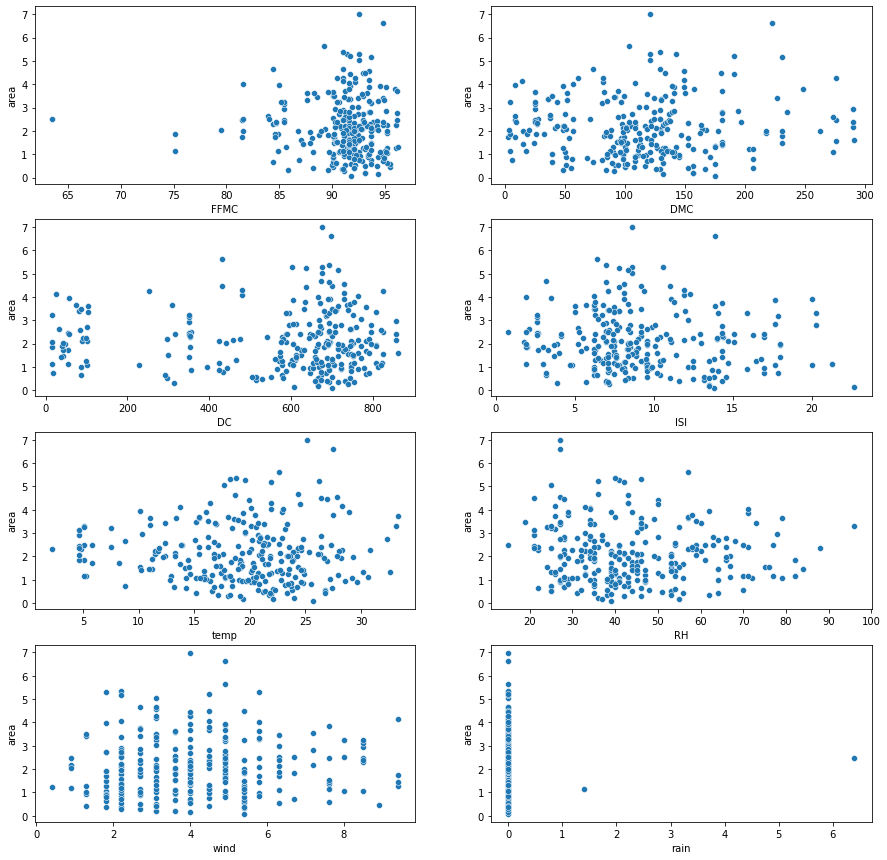

In [77]:
# Scatterplots against dependent variable
f, axes = plt.subplots(4,2, figsize=(15, 15))
counter = 0

for rows in range(4):
  for columns in range(2):    
    sns.scatterplot(x=clus_fire_present.iloc[:,(counter+2)], y=clus_fire_present['area'], ax = axes[rows,columns])
    counter += 1

Transformed burned area vs DC and transformed burned area vs DMC look interesting for cluster modelling.

#### DC vs Transformed Burned Area Cluster with K-Means

In [78]:
# Create a numpy array containing only DC (index 4) and area (index 10) features
X_clus = clus_fire_present.iloc[:, [4, 10]].values
#X_clus

[Text(0.5, 1.0, 'Montesinho Dataset')]

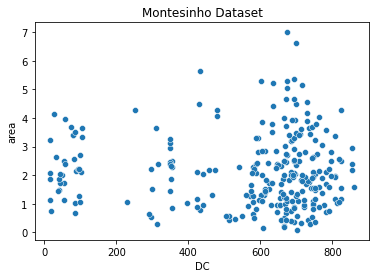

In [79]:
# Scatterplot with Seaborn
sns.scatterplot(data=clus_fire_present, x="DC", y="area").set(title='Montesinho Dataset')

Use the Elbow Method to Find the Optimal Number of Clusters

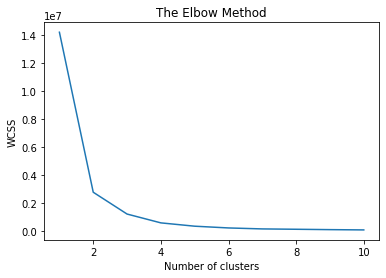

In [80]:
from sklearn.cluster import KMeans
wcss = []
for i in range(1, 11):
    kmeans = KMeans(n_clusters = i, init = 'k-means++', random_state = 42)
    kmeans.fit(X_clus)
    wcss.append(kmeans.inertia_)
plt.plot(range(1, 11), wcss)
plt.title('The Elbow Method')
plt.xlabel('Number of clusters')
plt.ylabel('WCSS')
plt.show()

Seeing the graph it seems that the optimal number of clusters should be between 2 and 3 clusters.

Training the K-Means model on the dataset

In [81]:
kmeans = KMeans(n_clusters = 3, init = 'k-means++', random_state = 42)
y_kmeans = kmeans.fit_predict(X_clus)

Visualising the clusters

Text(0, 0.5, 'log(area+1)')

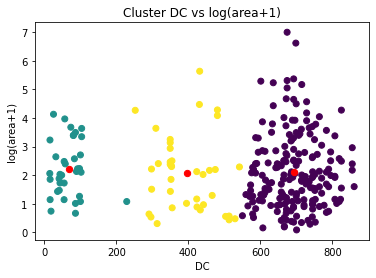

In [82]:
# We also represent the data in 2D-space with colors corresponding to cluster
plt.scatter(clus_fire_present['DC'], clus_fire_present['area'],c=kmeans.labels_)
plt.scatter(kmeans.cluster_centers_[:, 0], kmeans.cluster_centers_[:, 1], s = 40, c = 'red', label = 'Centroids')
plt.title('Cluster DC vs log(area+1)')
plt.xlabel('DC')
plt.ylabel('log(area+1)')

Silhouette index for each cluster number

In [83]:
# Compute the silhouette index for each cluster number
range_n_clusters = [2,3,4,5,6]
for n in range_n_clusters:
    clusterer = KMeans(n_clusters=n, n_init=10).fit(X_clus) # Clustering with the given number of clusters
    cluster_labels = clusterer.labels_ # Extract the labels
    silhouette_avg = silhouette_score(X_clus, cluster_labels) # Corresponding silhouette score
   
    # Display the results
    print("For n =", n, "Silhouette_score:", silhouette_avg)

For n = 2 Silhouette_score: 0.7524786261933093
For n = 3 Silhouette_score: 0.718136956835851
For n = 4 Silhouette_score: 0.5779073661036499
For n = 5 Silhouette_score: 0.6105632559365576
For n = 6 Silhouette_score: 0.625005347565839


3 Clusters is very close to the highest silhoutte score, so 3 clusters is still reasonable.

#### DMC vs Tranformed Burn Area Cluster with Hierarchical Clustering

In [84]:
# Create a numpy array containing only DMC (index 3) and DC (index 4) features
X_clus = clus_fire_present.iloc[:, [3, 10]].values
#X_clus

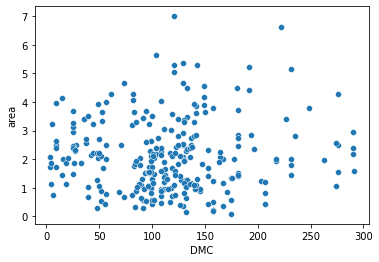

In [85]:
# Scatterplot with Seaborn of Original Data
sns.scatterplot(data=clus_fire_present, x="DMC", y="area")

Feature Scaling with Standarization

We standardize the columns of interest: necessary for hierarchical clustering. All variables will now have the same scale, i.e. same values ranges.

In [86]:
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
X_clus = sc.fit_transform(X_clus)
# Sanity check for the standarization
# X_clus

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


Text(0, 0.5, 'log(area+1)')

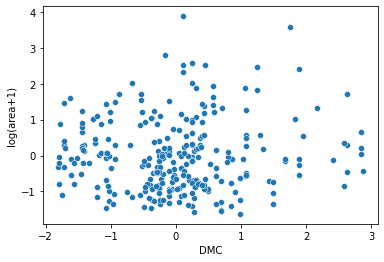

In [87]:
# Scatterplot with Seaborn after Standarization
sns.scatterplot(X_clus[:,0], X_clus[:,1])
plt.xlabel('DMC')
plt.ylabel('log(area+1)')

Use Dendogram to Find the Optimal Number of Clusters

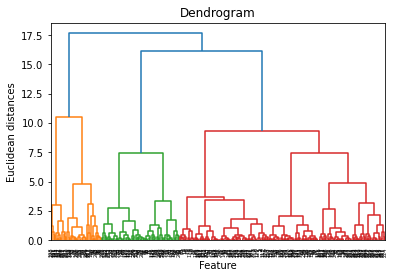

In [88]:
import scipy.cluster.hierarchy as sch
dendrogram = sch.dendrogram(sch.linkage(X_clus, method = 'ward'))
plt.title('Dendrogram')
plt.xlabel('Feature')
plt.ylabel('Euclidean distances')
plt.show()

Seeing the dendogram it seems that the optimal number of clusters is 3.

Training the Hierarchical Clustering model on the dataset

In [89]:
from sklearn.cluster import AgglomerativeClustering
hc = AgglomerativeClustering(n_clusters = 3, affinity = 'euclidean', linkage = 'ward')
y_hc = hc.fit_predict(X_clus)

Visualising the clusters

Text(0, 0.5, 'log(area+1)')

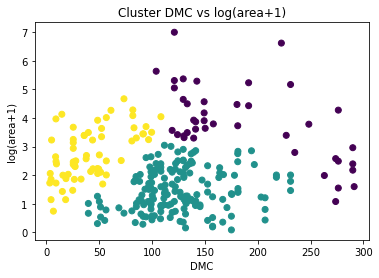

In [90]:
# We also represent the data in 2D-space with colors corresponding to cluster
plt.scatter(clus_fire_present['DMC'], clus_fire_present['area'],c=hc.labels_)
plt.title('Cluster DMC vs log(area+1)')
plt.xlabel('DMC')
plt.ylabel('log(area+1)')

Silhouette index for each cluster number

In [91]:
# Compute the silhouette index for each cluster number
range_n_clusters = [2,3,4,5,6,7,8,9,10]
for n in range_n_clusters:
    clusterer = AgglomerativeClustering(n_clusters=n).fit(X_clus) # Clustering with the given number of clusters
    cluster_labels = clusterer.labels_ # Extract the labels
    silhouette_avg = silhouette_score(X_clus, cluster_labels) # Corresponding silhouette score
   
    # Display the results
    print("For n =", n, "Silhouette_score:", silhouette_avg)

For n = 2 Silhouette_score: 0.4140939626887093
For n = 3 Silhouette_score: 0.3898133551356041
For n = 4 Silhouette_score: 0.3911760345164614
For n = 5 Silhouette_score: 0.31066390427072366
For n = 6 Silhouette_score: 0.31807222557260906
For n = 7 Silhouette_score: 0.35019668886546396
For n = 8 Silhouette_score: 0.3352417474441971
For n = 9 Silhouette_score: 0.33553468963613503
For n = 10 Silhouette_score: 0.3316241308983928


Apparently, the best number of clusters according to silhoutte score was 2, however 3 and 4 were pretty close also.

### 3-D Clustering with Burned Area Variable

In this section we generate a cluster between regions of the Montesinho park (which are composed of 2 spacial features X and Y) and the burned area, to try to understand principal burned regions.

In [92]:
# Create a numpy array containing only DC (index 4) and area (index 10) features
X_clus3d = clus_fire_present.iloc[:, [0, 1, 10]].values
#X_clus3d

For this we have to visualize in 3 Dimensions.

Text(0.5, 0, 'log(area+1)')

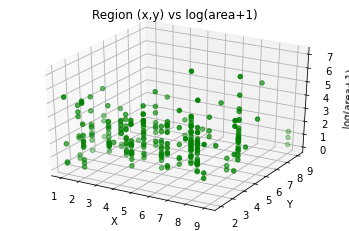

In [93]:
ax = plt.axes(projection ="3d")
ax.scatter3D(clus_fire_present['X'], clus_fire_present['Y'], clus_fire_present['area'], color = "green")
plt.title('Region (x,y) vs log(area+1)')
plt.xlabel('X')
plt.ylabel('Y')
ax.set_zlabel('log(area+1)')

Use the Elbow Method to Find the Optimal Number of Clusters

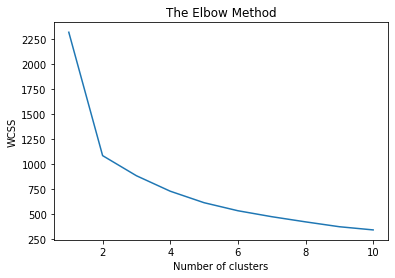

In [94]:
from sklearn.cluster import KMeans
wcss = []
for i in range(1, 11):
    kmeans = KMeans(n_clusters = i, init = 'k-means++', random_state = 42)
    kmeans.fit(X_clus3d)
    wcss.append(kmeans.inertia_)
plt.plot(range(1, 11), wcss)
plt.title('The Elbow Method')
plt.xlabel('Number of clusters')
plt.ylabel('WCSS')
plt.show()

Seeing the graph it seems that the optimal number of clusters should be 2 clusters.

Training the K-Means model on the dataset

In [95]:
kmeans = KMeans(n_clusters = 2, init = 'k-means++', random_state = 42)
y_kmeans = kmeans.fit_predict(X_clus3d)

Visualising the clusters

Text(0.5, 0, 'log(area+1)')

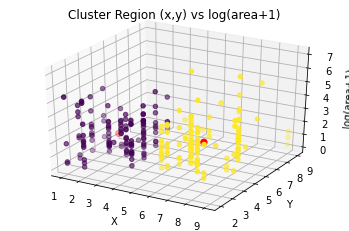

In [96]:
# We also represent the data in 3D-space with colors corresponding to cluster
ax = plt.axes(projection ="3d")
ax.scatter3D(clus_fire_present['X'], clus_fire_present['Y'], clus_fire_present['area'], c=kmeans.labels_)
ax.scatter3D(kmeans.cluster_centers_[:, 0], kmeans.cluster_centers_[:, 1], kmeans.cluster_centers_[:, 2], s = 40, c = 'red', label = 'Centroids')
plt.title('Cluster Region (x,y) vs log(area+1)')
plt.xlabel('X')
plt.ylabel('Y')
ax.set_zlabel('log(area+1)')

Silhouette index for each cluster number

In [97]:
# Compute the silhouette index for each cluster number
range_n_clusters = [2,3,4,5]
for n in range_n_clusters:
    clusterer = KMeans(n_clusters=n, n_init=10).fit(X_clus3d) # Clustering with the given number of clusters
    cluster_labels = clusterer.labels_ # Extract the labels
    silhouette_avg = silhouette_score(X_clus3d, cluster_labels) # Corresponding silhouette score
   
    # Display the results
    print("For n =", n, "Silhouette_score:", silhouette_avg)

For n = 2 Silhouette_score: 0.4463344017957013
For n = 3 Silhouette_score: 0.304452617167249
For n = 4 Silhouette_score: 0.3066264882147468
For n = 5 Silhouette_score: 0.31474348115889683


2 clusters is the highest silhoutte score, so 2 clusters was a good choice for grouping the fires in regions.

### 2-D Clustering Between Variables other than Area

In this section a cluster between 2 features different to the burn area will be made to try to find some interesting information.

We plot a huge bunch of scatterplots between almost all the variables of the clustering set not including area (which will obviously not be shown in this notebook because of space and execution time reasons). We found that building a cluster between DMC and DC may be interesting since both are moisture content indexes.

DMC is a numeric rating of the average moisture content of loosely compacted organic layers of moderate depth, whereas DC is a numeric rating of the average moisture content of deep, compact organic layers.

Unlike the 2-D Clustering with Burned Area section we will use 2 different models (K-Means and Hierarchical Clustering) to obtain the clusters of the same features in order to analyze the performance of the same models tackling the same objective.

#### DMC vs DC Cluster with K-Means

In [98]:
# Create a numpy array containing only DMC (index 3) and DC (index 4) features
X_clus = clus_data_fires.iloc[:, [3, 4]].values
#X_clus

[Text(0.5, 1.0, 'Ruspini')]

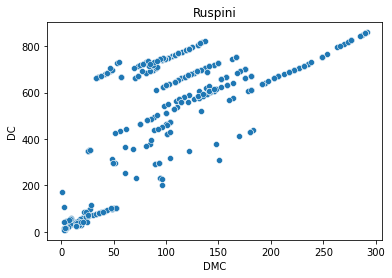

In [99]:
# Scatterplot with Seaborn
sns.scatterplot(data=clus_data_fires, x="DMC", y="DC").set(title='Ruspini')

Use the Elbow Method to Find the Optimal Number of Clusters

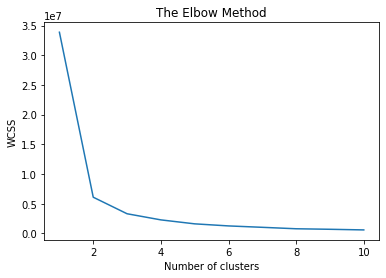

In [100]:
from sklearn.cluster import KMeans
wcss = []
for i in range(1, 11):
    kmeans = KMeans(n_clusters = i, init = 'k-means++', random_state = 42)
    kmeans.fit(X_clus)
    wcss.append(kmeans.inertia_)
plt.plot(range(1, 11), wcss)
plt.title('The Elbow Method')
plt.xlabel('Number of clusters')
plt.ylabel('WCSS')
plt.show()

Seeing the graph it seems that the optimal number of clusters should be 2.

Training the K-Means model on the dataset

In [101]:
kmeans = KMeans(n_clusters = 2, init = 'k-means++', random_state = 42)
y_kmeans = kmeans.fit_predict(X_clus)

Visualising the clusters

Text(0, 0.5, 'DC')

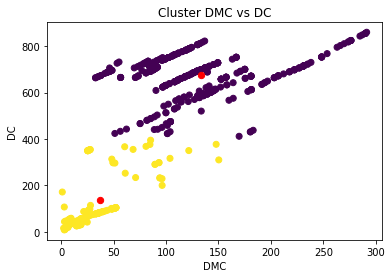

In [102]:
# We also represent the data in 2D-space with colors corresponding to cluster
plt.scatter(clus_data_fires['DMC'], clus_data_fires['DC'],c=kmeans.labels_)
plt.scatter(kmeans.cluster_centers_[:, 0], kmeans.cluster_centers_[:, 1], s = 40, c = 'red', label = 'Centroids')
plt.title('Cluster DMC vs DC')
plt.xlabel('DMC')
plt.ylabel('DC')

Silhouette index for each cluster number

In [103]:
# Compute the silhouette index for each cluster number
range_n_clusters = [2,3,4,5,6,7,8,9,10]
for n in range_n_clusters:
    clusterer = KMeans(n_clusters=n, n_init=10).fit(X_clus) # Clustering with the given number of clusters
    cluster_labels = clusterer.labels_ # Extract the labels
    silhouette_avg = silhouette_score(X_clus, cluster_labels) # Corresponding silhouette score
   
    # Display the results
    print("For n =", n, "Silhouette_score:", silhouette_avg)

For n = 2 Silhouette_score: 0.7493319675918848
For n = 3 Silhouette_score: 0.6538654909862248
For n = 4 Silhouette_score: 0.4569490766424163
For n = 5 Silhouette_score: 0.5082515008947516
For n = 6 Silhouette_score: 0.5023887706929074
For n = 7 Silhouette_score: 0.49181174732414634
For n = 8 Silhouette_score: 0.5192751426795764
For n = 9 Silhouette_score: 0.5428658003920905
For n = 10 Silhouette_score: 0.5005452492362729


2 clusters is the rigth choice given the silhoutte score.

#### DMC vs DC Cluster with Hierarchical Clustering

In [104]:
# Create a numpy array containing only DMC (index 3) and DC (index 4) features
X_clus = clus_data_fires.iloc[:, [3, 4]].values
#X_clus

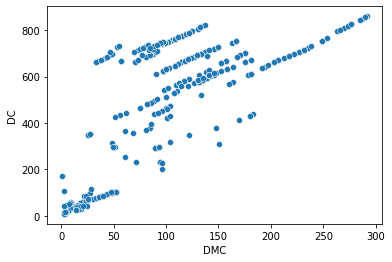

In [105]:
# Scatterplot with Seaborn of Original Data
sns.scatterplot(data=clus_data_fires, x="DMC", y="DC")

Feature Scaling with Standarization

We standardize the columns of interest: necessary for hierarchical clustering. All variables will now have the same scale, i.e. same values ranges.

In [106]:
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
X_clus = sc.fit_transform(X_clus)
# Sanity check for the standarization
# X_clus

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


Text(0, 0.5, 'DC')

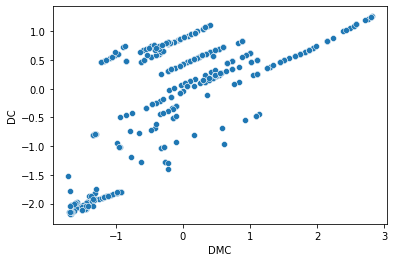

In [107]:
# Scatterplot with Seaborn after Standarization
sns.scatterplot(X_clus[:,0], X_clus[:,1])
plt.xlabel('DMC')
plt.ylabel('DC')

Use Dendogram to Find the Optimal Number of Clusters

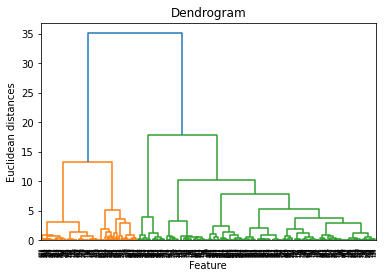

In [108]:
import scipy.cluster.hierarchy as sch
dendrogram = sch.dendrogram(sch.linkage(X_clus, method = 'ward'))
plt.title('Dendrogram')
plt.xlabel('Feature')
plt.ylabel('Euclidean distances')
plt.show()

Seeing the dendogram it seems that the optimal number of clusters is 2.

Training the Hierarchical Clustering model on the dataset

In [109]:
from sklearn.cluster import AgglomerativeClustering
hc = AgglomerativeClustering(n_clusters = 2, affinity = 'euclidean', linkage = 'ward')
y_hc = hc.fit_predict(X_clus)

Visualising the clusters

Text(0, 0.5, 'DC')

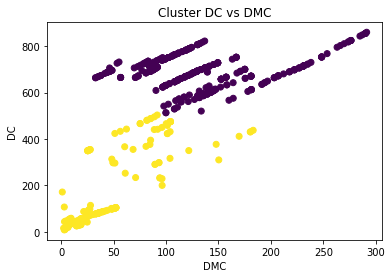

In [110]:
# We also represent the data in 2D-space with colors corresponding to cluster
plt.scatter(clus_data_fires['DMC'], clus_data_fires['DC'],c=hc.labels_)
plt.title('Cluster DC vs DMC')
plt.xlabel('DMC')
plt.ylabel('DC')

Silhouette index for each cluster number

In [111]:
# Compute the silhouette index for each cluster number
range_n_clusters = [2,3,4,5,6,7,8,9,10]
for n in range_n_clusters:
    clusterer = AgglomerativeClustering(n_clusters=n).fit(X_clus) # Clustering with the given number of clusters
    cluster_labels = clusterer.labels_ # Extract the labels
    silhouette_avg = silhouette_score(X_clus, cluster_labels) # Corresponding silhouette score
   
    # Display the results
    print("For n =", n, "Silhouette_score:", silhouette_avg)

For n = 2 Silhouette_score: 0.5694439057166194
For n = 3 Silhouette_score: 0.5487628035828361
For n = 4 Silhouette_score: 0.5120166541385109
For n = 5 Silhouette_score: 0.4417523150234489
For n = 6 Silhouette_score: 0.43182521789987294
For n = 7 Silhouette_score: 0.45682165890389953
For n = 8 Silhouette_score: 0.4547884270392672
For n = 9 Silhouette_score: 0.4616214764515651
For n = 10 Silhouette_score: 0.47086744307124273


2 clusters was the rigth choice given the silhoutte score.

Since the K-means model had a better silhouette score for the same clustering goal, we can conclude its performance was better than Hierarchical modelling.